In [1]:
%run import.ipynb

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23596 entries, 0 to 5184
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Geography                  23596 non-null  object 
 1   Timeframe                  23592 non-null  object 
 2   Current Year Week Ending   23592 non-null  object 
 3   Type                       23592 non-null  object 
 4   ASP Current Year           23592 non-null  float64
 5   Total Bulk and Bags Units  23592 non-null  float64
 6   4046 Units                 23592 non-null  float64
 7   4225 Units                 23592 non-null  float64
 8   4770 Units                 23592 non-null  float64
 9   TotalBagged Units          23592 non-null  float64
 10  SmlBagged Units            0 non-null      float64
 11  LrgBagged Units            0 non-null      float64
 12  X-LrgBagged Units          0 non-null      float64
dtypes: float64(9), object(4)
memory usage: 2.5+ MB


In [28]:
df_conventional = filtered_df_greaterregions[filtered_df_greaterregions['Type'] == 'Conventional']
df_organic = filtered_df_greaterregions[filtered_df_greaterregions['Type'] == 'Organic']

In [6]:
price_conventional = filtered_df_greaterregions[filtered_df_greaterregions['Type'] == 'Conventional'][['Current Year Week Ending', 'ASP Current Year']]
price_organic = filtered_df_greaterregions[filtered_df_greaterregions['Type'] == 'Organic'][['Current Year Week Ending', 'ASP Current Year']]

In [29]:
# Agrupar por número de semana y calcular el promedio de precios
conventional_seasonality = df_conventional.groupby('Week_Number')['ASP Current Year'].mean()
organic_seasonality = df_organic.groupby('Week_Number')['ASP Current Year'].mean()

In [31]:
# Crear un DataFrame para visualizar mejor
seasonality_df = pd.DataFrame({
    'Conventional': conventional_seasonality,
    'Organic': organic_seasonality
}).reset_index()

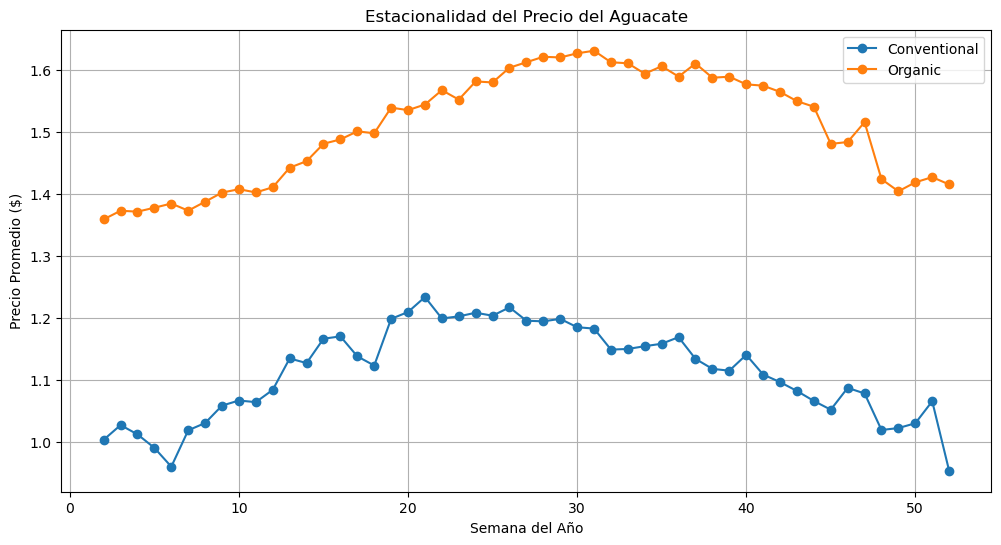

In [32]:
# Visualización de la estacionalidad
plt.figure(figsize=(12, 6))
plt.plot(seasonality_df['Week_Number'], seasonality_df['Conventional'], label='Conventional', marker='o')
plt.plot(seasonality_df['Week_Number'], seasonality_df['Organic'], label='Organic', marker='o')

plt.title('Estacionalidad del Precio del Aguacate')
plt.xlabel('Semana del Año')
plt.ylabel('Precio Promedio ($)')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# Extraer mes y año
filtered_df_greaterregions['Year'] = filtered_df_greaterregions['Current Year Week Ending'].dt.year
filtered_df_greaterregions['Month'] = filtered_df_greaterregions['Current Year Week Ending'].dt.month

C:\Users\heatb\AppData\Local\Temp\ipykernel_17852\973764294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_greaterregions['Year'] = filtered_df_greaterregions['Current Year Week Ending'].dt.year
C:\Users\heatb\AppData\Local\Temp\ipykernel_17852\973764294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_greaterregions['Month'] = filtered_df_greaterregions['Current Year Week Ending'].dt.month


In [34]:
# Agrupar por Año y Mes para calcular promedios
monthly_conventional = (
    df_conventional.groupby(['Year', 'Month'])['ASP Current Year']
    .mean()
    .reset_index()
    .rename(columns={'ASP Current Year': 'Conventional'})
)

monthly_organic = (
    df_organic.groupby(['Year', 'Month'])['ASP Current Year']
    .mean()
    .reset_index()
    .rename(columns={'ASP Current Year': 'Organic'})
)

# Combinar ambos tipos en un solo DataFrame
monthly_seasonality = pd.merge(
    monthly_conventional, 
    monthly_organic, 
    on=['Year', 'Month'], 
    how='outer'
)

# Ordenar por año y mes para garantizar coherencia
monthly_seasonality.sort_values(by=['Year', 'Month'], inplace=True)

KeyError: 'Year'